# Implementación de un sistema de detección y monitoreo de desbordamientos de ríos usando procesamiento digital de imágenes satelitales con Python

## Proceso inicial

La libreria earthpy debe estar instalado necesariamente

In [10]:
!pip install earthpy

Defaulting to user installation because normal site-packages is not writeable


Llamar a las librerias

In [2]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

Cambiar data a el directorio donde se sacarán los datos

In [3]:
%cd /home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/archivos del proyecto/data-de-satelite/madagascar

/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/archivos del proyecto/data-de-satelite/madagascar


In [4]:
# generar un path a la carpeta madagascar
path_madagascar = "/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/archivos del proyecto/data-de-satelite/madagascar"

Generar la ruta para la data antes y durante las inundaciones.

In [5]:
before_floods_data_path = "Madagascar_18_01_2017"
during_floods_data_path = "Madagascar_27_01_2020"

## Antes de las inundaciones

In [6]:
before_floods = glob(f"{path_madagascar}/Madagascar_18_01_2017/*B?*.tiff") 
# ordenar la data
before_floods.sort()
# print
before_floods

['/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/archivos del proyecto/data-de-satelite/madagascar/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B01_(Raw).tiff',
 '/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/archivos del proyecto/data-de-satelite/madagascar/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B02_(Raw).tiff',
 '/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/archivos del proyecto/data-de-satelite/madagascar/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B03_(Raw).tiff',
 '/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/archivos del proyecto/data-de-satelite/madagascar/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B04_(Raw).tiff',
 '/home/luis/Documentos/UCSM/SEMESTRE 2021/proyecto de tesis/archivos del proyecto/data-de-satelite/madagascar/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_

In [7]:
l = []
for i in before_floods:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

arr_bef = np.stack(l)

In [8]:
arr_bef.shape

(9, 602, 676)

### Visualización de la data

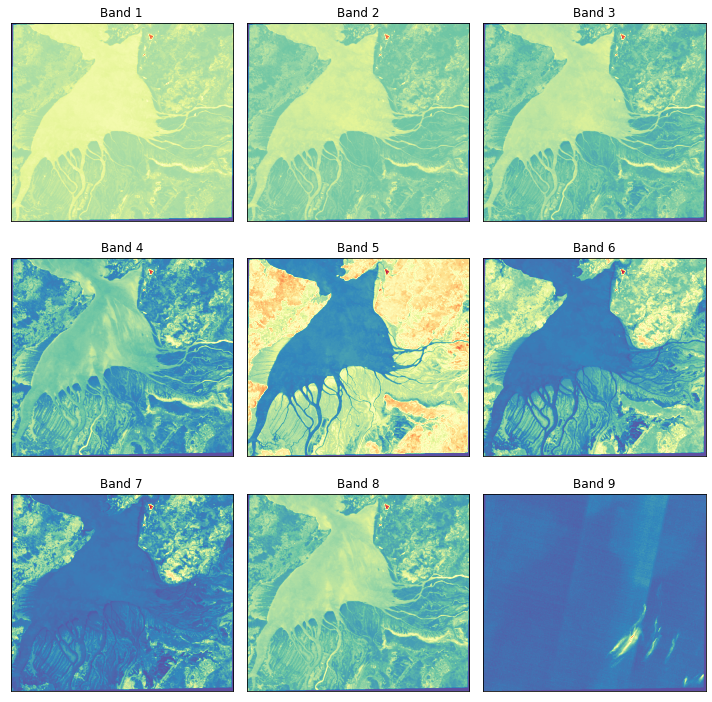

In [9]:
# visualizar bandas
ep.plot_bands(arr_bef, cmap='Spectral_r', cols=3, figsize=(10, 10), cbar=False)
plt.show()